In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from model_helpers import r2

In [20]:
def r2(true, pred):
    '''
    r2 = 1 - (RSS / TSS)
    R^2	=	coefficient of determination
    RSS	=	sum of squares of residuals
    TSS	=	total sum of squares
    '''
    m = np.mean(true)
    TSS = sum((true - m) ** 2)
    RSS = sum((true - pred) ** 2)
    r2 = 1 - (RSS / TSS)
    return r2

In [8]:
df = pd.read_csv("./preds_df.csv")
df['B'] = df['impath'].str.split("_").str[0].str.split("-").str[3]
df.head()

,impath,true,pred,B
0,MEX-ADM2-1590546715-B3_2010_1_box3_JAN.png,494.0,221.697769,B3
1,MEX-ADM2-1590546715-B3_2010_1_box5_JAN.png,494.0,226.066864,B3
2,MEX-ADM2-1590546715-B3_2010_1_box7_JAN.png,494.0,236.648834,B3
3,MEX-ADM2-1590546715-B3_2010_1_box9_JAN.png,494.0,226.030823,B3
4,MEX-ADM2-1590546715-B3_2010_1_box11_JAN.png,494.0,229.799438,B3


In [15]:
avg_preds = pd.DataFrame(df.groupby(df['B'])['true', 'pred'].mean()).reset_index()
avg_preds.head()

/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,B,true,pred
0,B1,479.0,235.921432
1,B10,1048.0,233.520558
2,B100,39.0,232.829655
3,B1001,122.0,246.877461
4,B1002,9.0,232.047528


(0.0, 300.0)

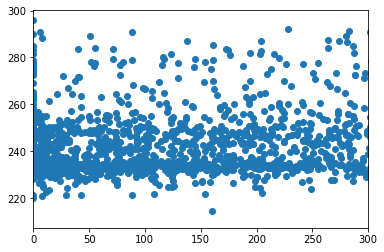

In [23]:
plt.scatter(avg_preds['true'], avg_preds['pred'])
plt.xlim([0, 300])

In [22]:
r2(avg_preds['true'], avg_preds['pred'])

-0.002477395066842192

In [24]:
def mae(real, pred):
    '''
    Calculates MAE of an epoch
    '''
    return abs(real - pred).mean()

In [25]:
mae(avg_preds['true'], avg_preds['pred'])

229.96538636158243

In [26]:
avg_preds['true'].mean()

295.46701225259187

In [27]:
avg_preds['pred'].mean()

245.4559059533221